# **Basic Tasks**

## **Task 1-2: Linear Regression**

**Task 1-2:** Find some real data set (or build your own toy dataset) with at least 30 samples to perform Linear Regression with simple Linear Regressor (using TF implementation), Scikit-learn based Linear Regressor and Keras based Linear Regressor. Show the trained model parameters (loss, accuracy, etc.) for each solution and visualize the prediction results on plot. Run predictions on several selected inputs and compare predicted values.

**Dataset:** Walmart Dataset

**Application:** Walmart Store Sales Prediction - Regression Problem

### **Data Preparation**`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
data = pd.read_csv("/content/Walmart.csv")
print('\033[1mInitial Dataset: \033[0m')
display(data.head())
print('\n\033[1mInference: \033[0m', "The Dataset has ", data.shape[1], " attributes and ", data.shape[0], " samples")
print("\n\033[1mDataset Descriptive Statistics:\033[0m")
display(data.describe())
print("\n\033[1mCount of Non-NA Samples:\033[0m")
display(data.count())
print("\n\033[1mSum of NA samples in Features:\033[0m")
display(data.isna().sum())
print("\n\033[1mFeatures Initial Datatypes:\033[0m")
display(data.dtypes)

Initial Dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Inference:  The Dataset has  8  attributes and  6435  samples

Dataset Descriptive Statistics:


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000



Count of Non-NA Samples:


Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64


Sum of NA samples in Features:


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Features Initial Datatypes:


Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

**Features Correction**
As we can see from ***Features' Initial Datatypes*** report, we have a problem with the 'Date' feature — its datatype is 'object' which will be quite inconvinient to work with and normilize. The best option will be to convert it to numerical datatype. For that I will split the column of Date into 3: 'Year', 'Month', 'Weekday'. That way we'll not only convert this feature to convinience, but also will be able to spot patterns due to the day of the week, giving us information which weekdays are more profitable (same with month and year).

In [ ]:
#Convert 'object' to 'datetime64 type
data.Date = pd.to_datetime(data.Date)

#Add new features to the Dataset and delete unneeded 'Date'
data['Weekday'] = data.Date.dt.weekday
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

data.drop(['Date'], axis = 1, inplace = True)
display(data.head())
print("\n\033[1mFeatures' Datatypes Check:\033[0m")
display(data.dtypes)

<ipython-input-4-4569c1a5e354>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date = pd.to_datetime(data.Date)


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010



Features' Datatypes Check:


Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Weekday           int64
Month             int64
Year              int64
dtype: object

In [ ]:
print("\033[1mDiscovering Number of Unique Values In Features:\033[0m")

#This can be done by checking the number of unique values in each feature of the dataset
data.nunique().sort_values()

Discovering Number of Unique Values In Features:


Holiday_Flag       2
Year               3
Weekday            7
Month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

**Inference:** From the report on ***Number Of Unique Values In Features*** we see that, logically, we can see that we have 5 categorical features:

*   Holiday_Flag
*   Year
*   Weekday
*   Month
*   Store

And 4 numerical due to the vast amount of unique values in features:

*   Unemployment
*   Fuel_Price
*   CPI
*   Temperature

Weekly_Sales we don't count in any category anyway, because it's the Target.


Distribution of Target Feature -- Weekly Sales


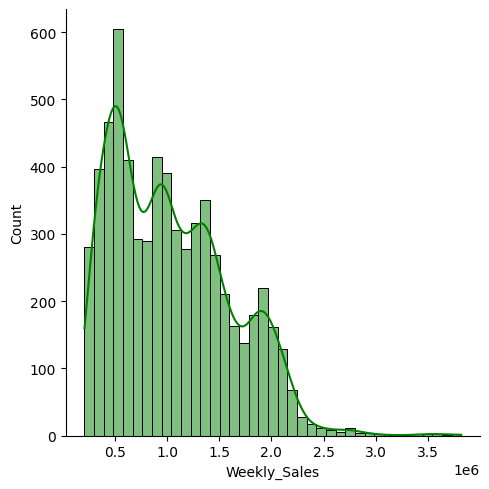

In [ ]:
print("\033[1mDistribution of Target Feature -- Weekly Sales\033[0m")
target = 'Weekly_Sales'
sns.displot(data[target], color = 'g', kde = True)
plt.show()

**Inference:** The Target Variable (Weekly Sales) seems to be normally distributed, averaging around 20 units.

Categorical Features Visualisation:


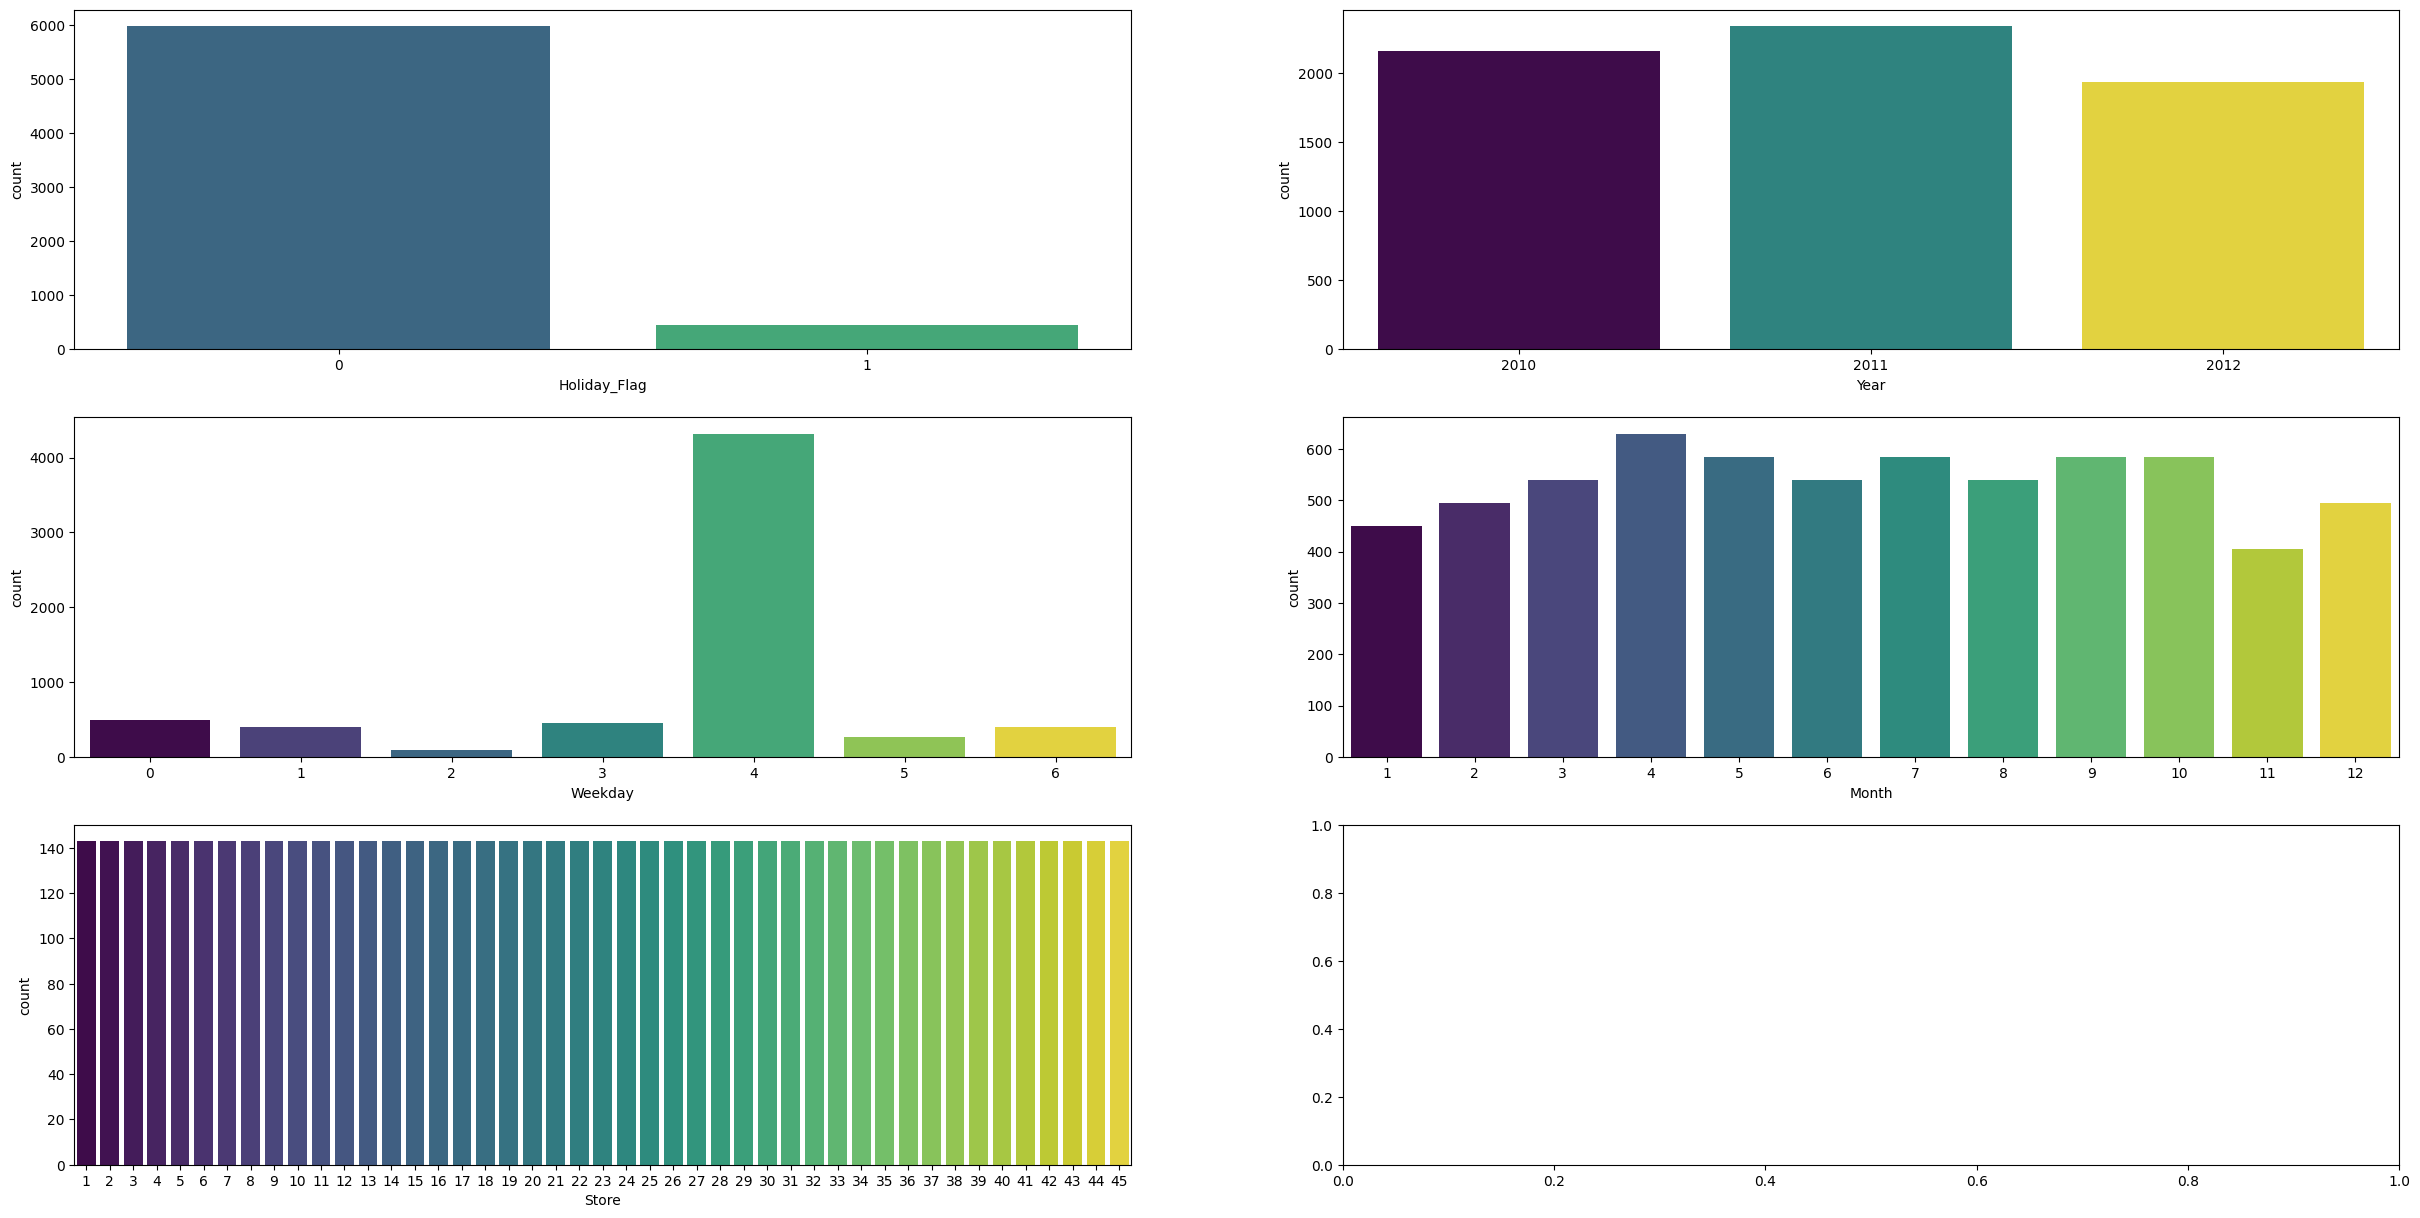

In [ ]:
print("\033[1mCategorical Features Visualisation:\033[0m")
categotical_features = data[['Holiday_Flag', 'Year', 'Weekday', 'Month', 'Store']]

fig, ax = plt.subplots(3, 2, figsize=(30, 15))
for variable, subplot in zip(categotical_features, ax.flatten()):
    sns.countplot(x=variable, data=categotical_features, ax = subplot, palette = 'viridis', hue = variable, legend = False)

Numerical Features Distribution:


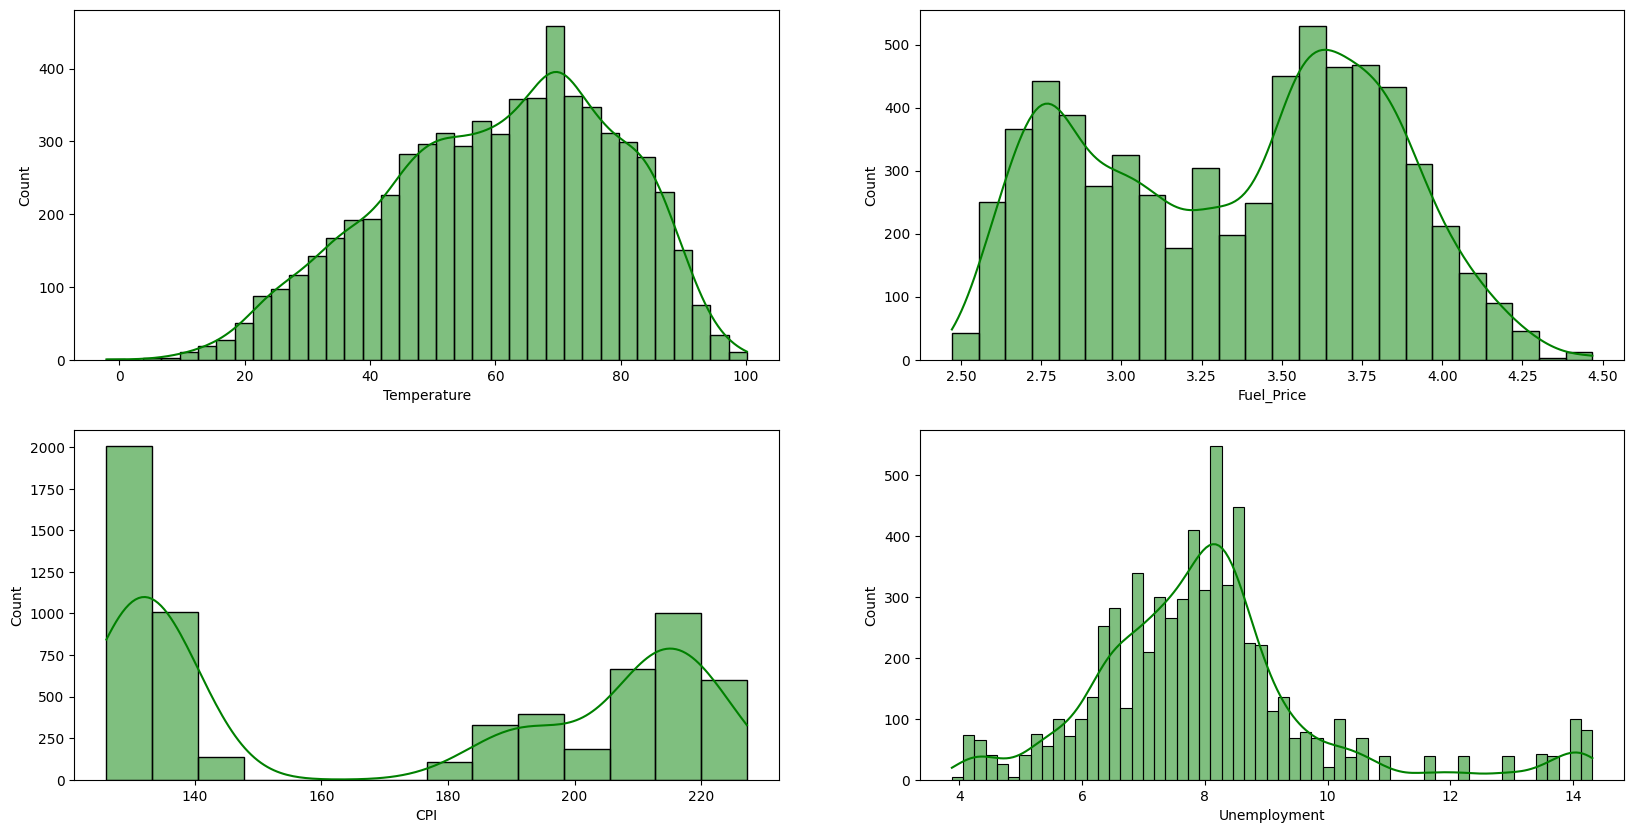

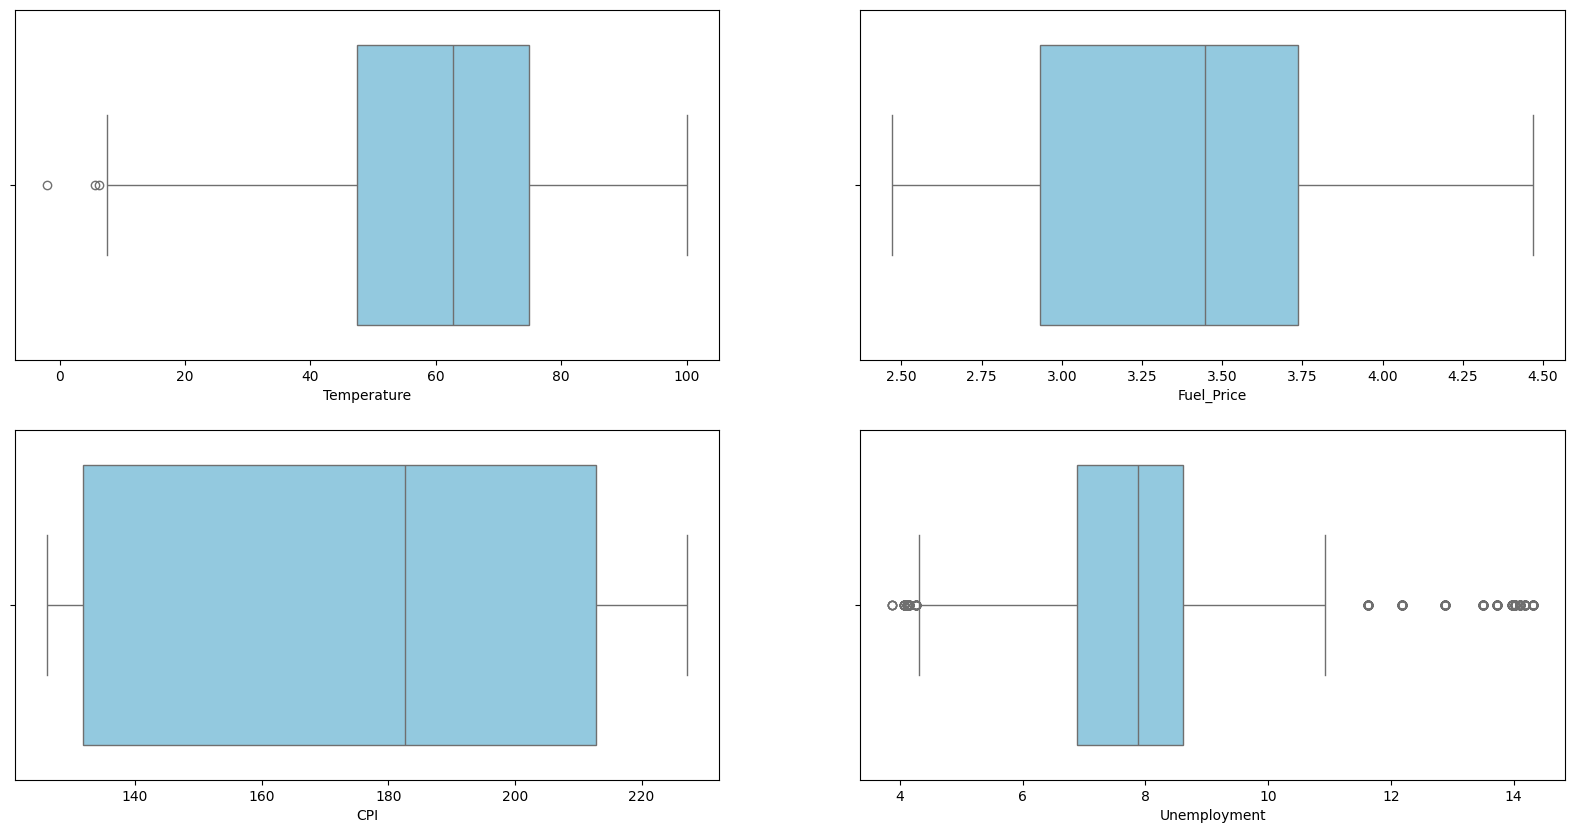

In [ ]:
print("\033[1mNumerical Features Distribution:\033[0m")
numerical_features = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(numerical_features, ax.flatten()):
  sns.histplot(data[variable], color = 'g', kde = True, ax = subplot)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(numerical_features, ax.flatten()):
  sns.boxplot(x=data[variable], color='skyblue', ax= subplot)
plt.show()

**Inference:** From boxplots we can clearly see that there some outliers that will need to be fixed.

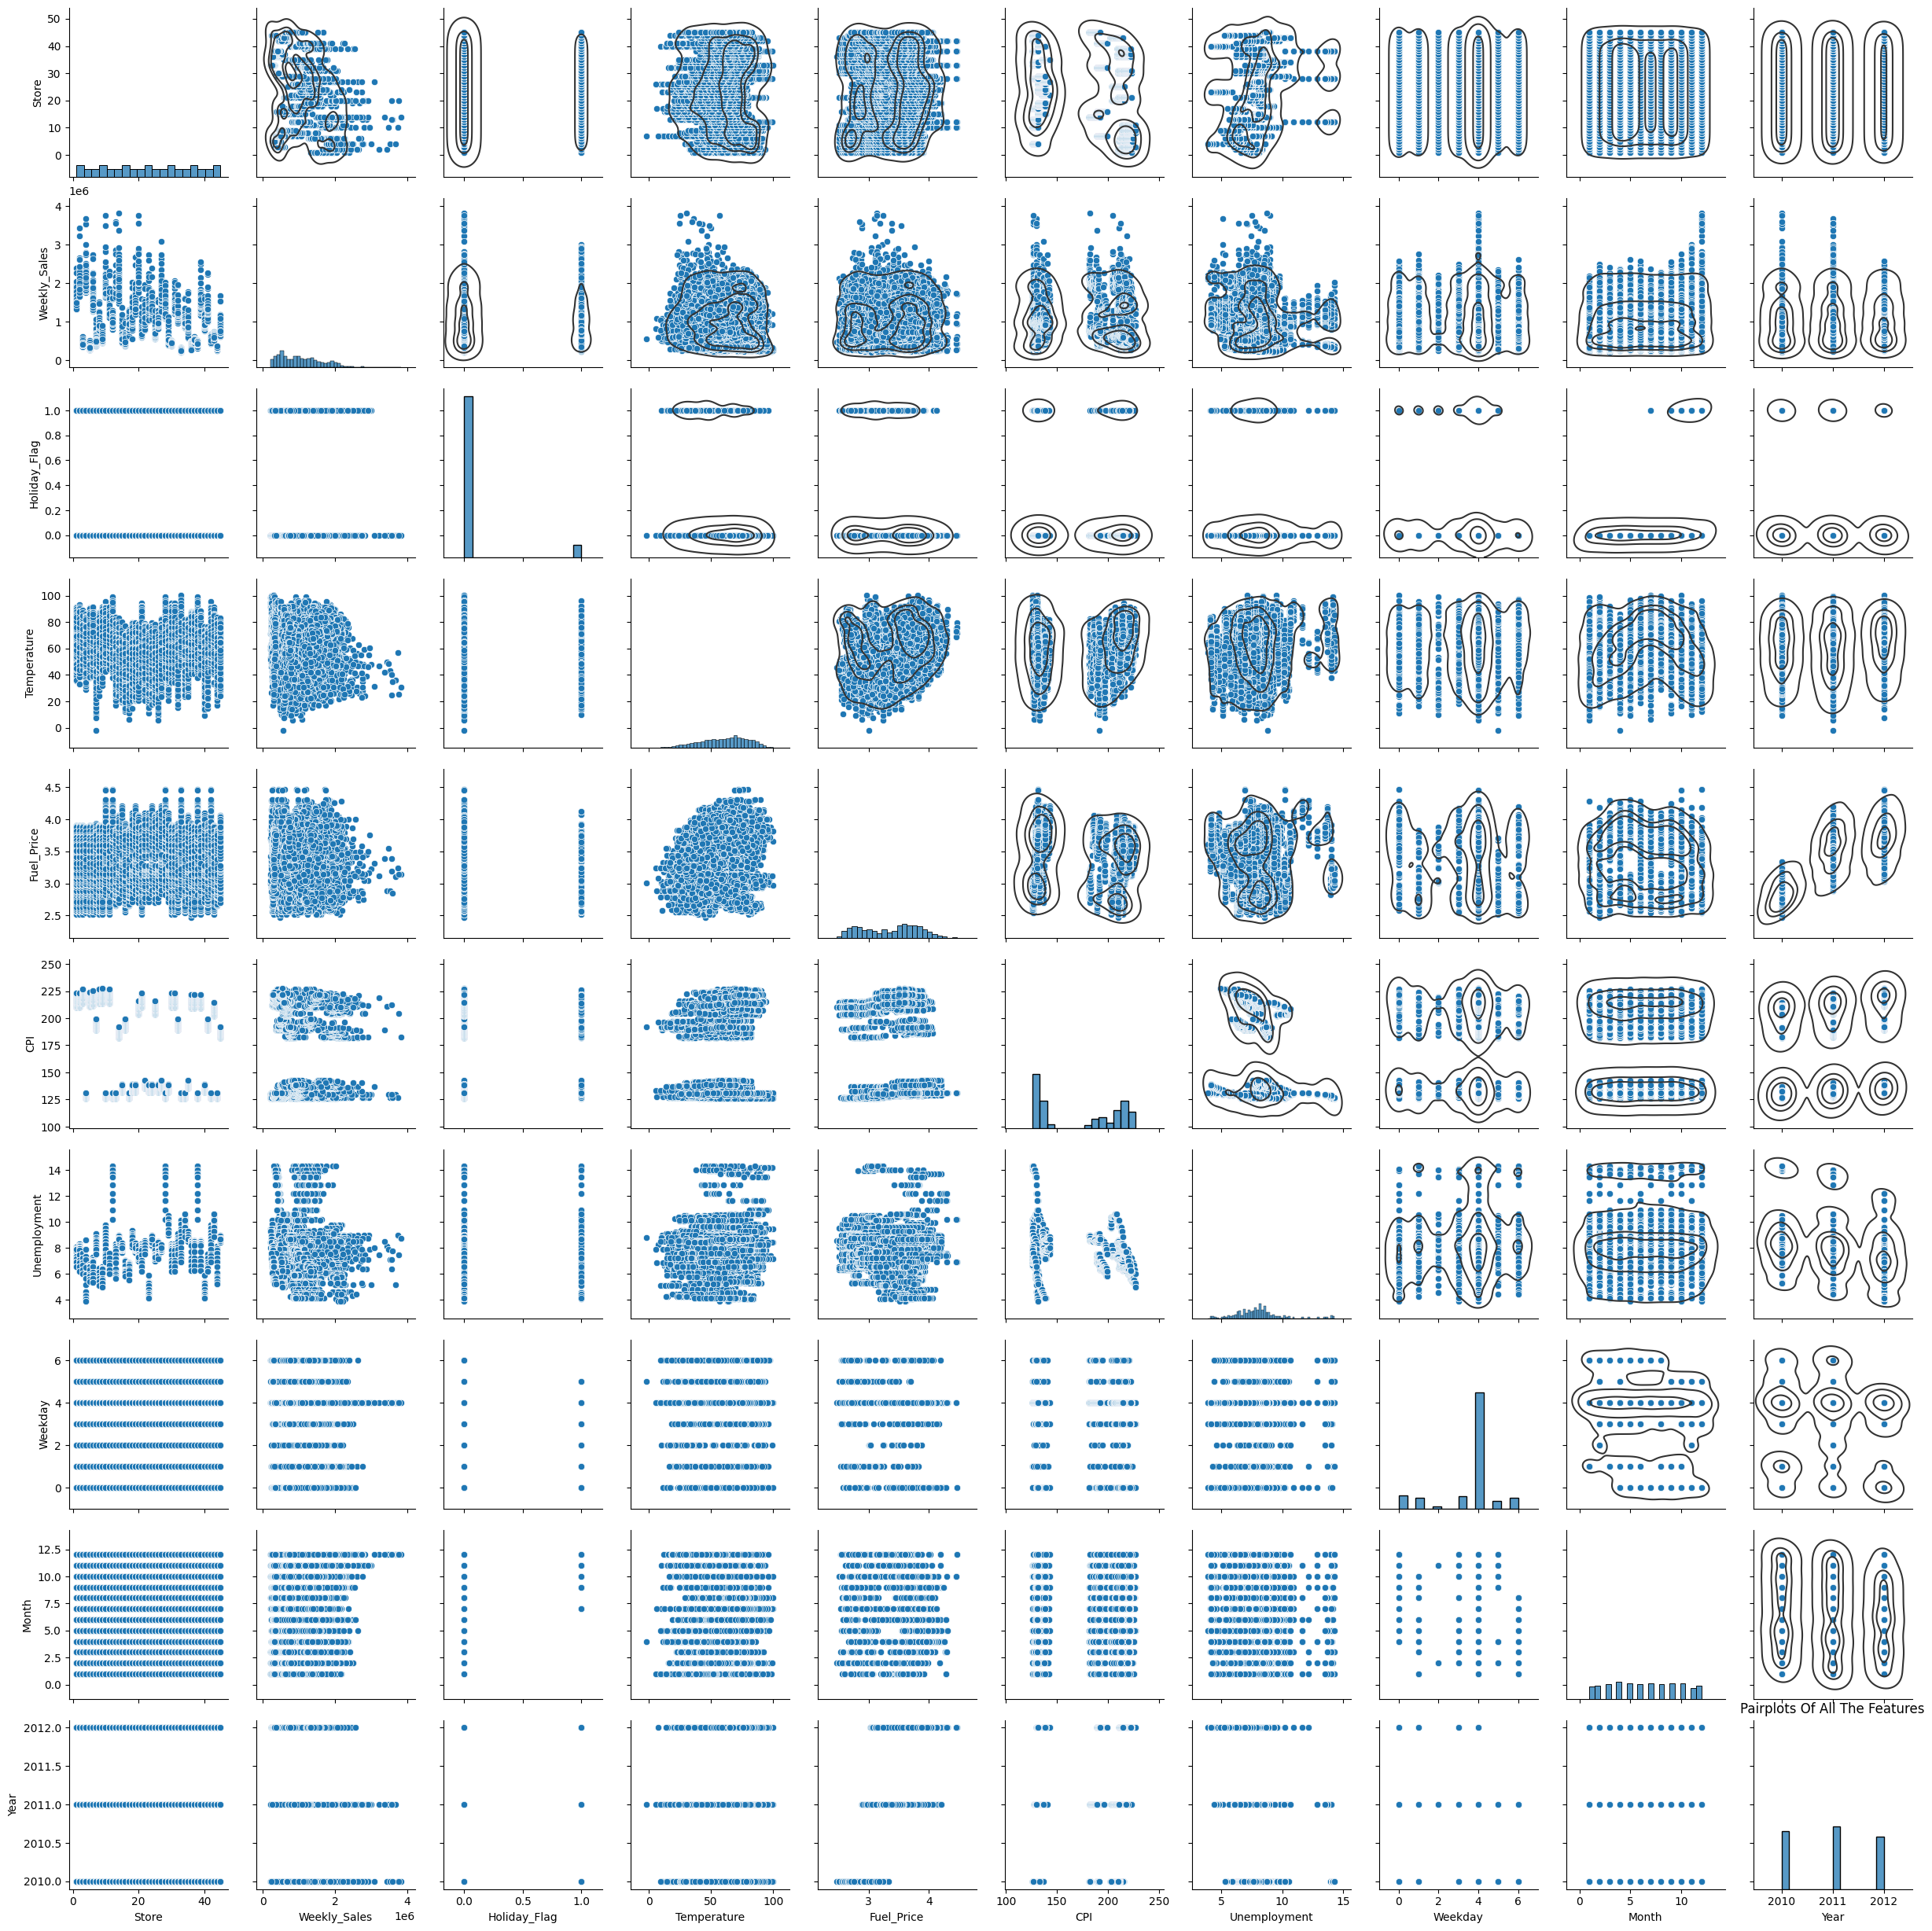

In [ ]:
plot = sns.pairplot(data)
plt.title("Pairplots Of All The Features")
plot.map_upper(sns.kdeplot, levels = 4, color = ".2")
plt.show()

**Inference:** From the plot we see that there is multicollinearity in data. Collinearity refers to the situation where two or more predictor variables in a multiple regression model are highly correlated with each other. Collinearity occurs when there is a linear relationship between two or more independent variables. To explore it in more compact way I will also look at the correlation heatmap.

<Axes: >

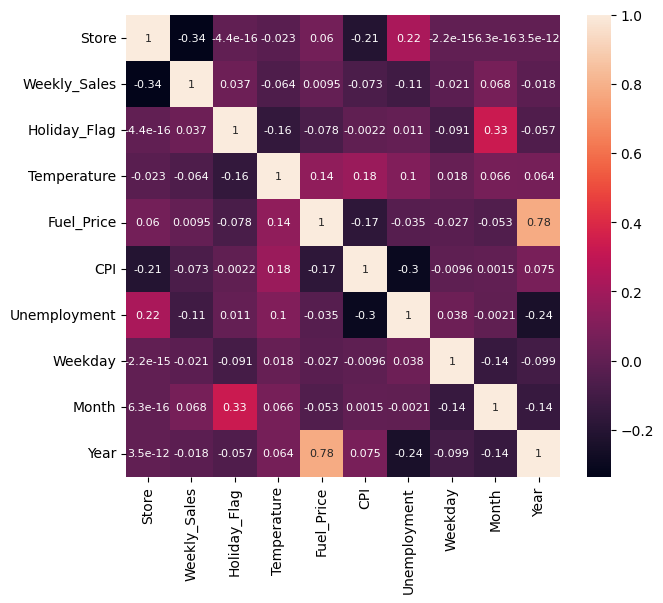

In [ ]:
pearson_coefs = data.corr(method = "pearson")
fig, ax = plt.subplots(figsize = (7,6))
heatmap_plot = sns.heatmap(pearson_coefs, annot = True, annot_kws={"size": 8})
heatmap_plot

**Inference:** With the correlation heatmap it is easier to see different kinds of correlations between features:

1. There is a negative correlation between the store and weekly sales, indicating that larger store numbers are associated with slightly lower weekly sales.

2. There is a weak negative correlation between weekly sales and temperature. This suggests that as the temperature increases, weekly sales tend to decrease slightly.

3. There is a small positive correlation between weekly sales and the holiday flag, suggesting that weekly sales may be slightly higher during holiday periods.

4. There is a very weak positive correlation between weekly sales and fuel price. This suggests a minimal association between weekly sales and fuel prices.

5. There is a weak negative correlation between weekly sales and CPI, indicating a slight decrease in weekly sales with increasing CPI.

6. There is a weak negative correlation between weekly sales and unemployment, suggesting that as unemployment increases, weekly sales may decrease slightly.

7. There is a very weak negative correlation between weekly sales and weekday. This suggests a minimal association between weekly sales and the day of the week.

8. There is a positive correlation between weekly sales and month, indicating that sales may show some seasonality or variation across different months.

9. There is a negative correlation between weekly sales and year. This may indicate a decreasing trend in weekly sales over the years covered by the data.

10. There is a negative correlation between fuel price and CPI, suggesting a potential relationship between these two variables.

11. There is a negative correlation between fuel price and unemployment, indicating a potential relationship between these two variables.

12. There is a strong positive correlation between fuel price and year, suggesting a significant increase in fuel prices over the years.

In [ ]:
#Checking for and deleating duplicates
original_data = data.copy(deep=True)
data.drop_duplicates(inplace=True)

if data.shape == original_data.shape:
  print("\033[1mInference:\033[0m The Dataset didn't have any duplicates")
else:
  print("\033[1mInference:\033[0m The Dataset had duplicates, they were fixed ---> {original_data.shape[0] - data.shape[0]}")

Inference: The Dataset didn't have any duplicates


In [ ]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                        pd.get_dummies(df['Holiday_Flag']),
                        pd.get_dummies(df['Year']),
                        pd.get_dummies(df['Month']),
                        pd.get_dummies(df['Weekday']),
                        pd.get_dummies(df['Store']),
                        ], axis = 1)
  features =features.drop(['Holiday_Flag', 'Year', 'Month', 'Weekday', 'Store'], axis = 1)
  return features

In [ ]:
features = get_dummies(data)
display(features)
print("Features Dataset Shape: ", features.shape)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,0,1,2010,2011,2012,...,36,37,38,39,40,41,42,43,44,45
0,1643690.90,42.31,2.572,211.096358,8.106,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,39.93,2.514,211.289143,8.106,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,46.63,2.561,211.319643,8.106,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,46.50,2.625,211.350143,8.106,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,64.89,3.985,192.170412,8.667,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,54.47,4.000,192.327265,8.667,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,56.47,3.969,192.330854,8.667,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Features Dataset Shape:  (6435, 74)


### **Simple Linear Regression -- TF Implementation**

array([[ 42.31     ,   2.572    , 211.0963582, ...,   0.       ,
          0.       ,   0.       ],
       [ 38.51     ,   2.548    , 211.2421698, ...,   0.       ,
          0.       ,   0.       ],
       [ 39.93     ,   2.514    , 211.2891429, ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [ 54.47     ,   4.       , 192.3272654, ...,   0.       ,
          0.       ,   1.       ],
       [ 56.47     ,   3.969    , 192.3308542, ...,   0.       ,
          0.       ,   1.       ],
       [ 58.85     ,   3.882    , 192.3088989, ...,   0.       ,
          0.       ,   1.       ]])

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

Выходные данные были обрезаны до нескольких последних строк (5000).
MSE train:  0.068477176
R^2 train:  0.93152285
Epoch:  8336
MSE train:  0.06847717
R^2 train:  0.93152285
Epoch:  8337
MSE train:  0.068477154
R^2 train:  0.93152285
Epoch:  8338
MSE train:  0.06847715
R^2 train:  0.93152285
Epoch:  8339
MSE train:  0.06847713
R^2 train:  0.93152285
Epoch:  8340
MSE train:  0.06847712
R^2 train:  0.93152285
Epoch:  8341
MSE train:  0.06847711
R^2 train:  0.9315229
Epoch:  8342
MSE train:  0.068477094
R^2 train:  0.9315229
Epoch:  8343
MSE train:  0.06847708
R^2 train:  0.9315229
Epoch:  8344
MSE train:  0.06847707
R^2 train:  0.9315229
Epoch:  8345
MSE train:  0.06847706
R^2 train:  0.93152297
Epoch:  8346
MSE train:  0.06847704
R^2 train:  0.93152297
Epoch:  8347
MSE train:  0.06847702
R^2 train:  0.93152297
Epoch:  8348
MSE train:  0.06847701
R^2 train:  0.93152297
Epoch:  8349
MSE train:  0.068477
R^2 train:  0.93152297
Epoch:  8350
MSE train:  0.06847699
R^2 train:  0.931523
Epoch:

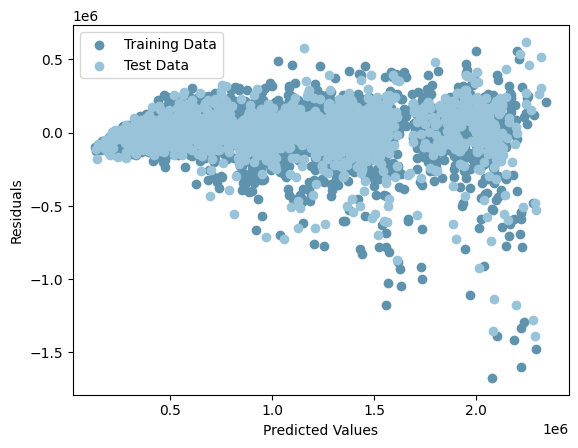

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# Linear regressor
class SimpleLinearRegression:
  def __init__(self, initializer='random'):
    if initializer=='ones':
      self.var = 1.
    elif initializer=='zeros':
      self.var = 0.
    elif initializer=='random':
      self.var = tf.random.uniform(shape=[], minval=0., maxval=1.)

    self.m = tf.Variable(1., shape=tf.TensorShape(None))
    self.b = tf.Variable(self.var)

  def predict(self, x):
    return tf.reduce_sum(self.m * x, 1) + self.b

  def mse(self, true, predicted):
    return tf.reduce_mean(tf.square(true-predicted))

  def f_r2_score(self, true, predicted):
    # Calculate the mean of the true values
    mean_true = tf.reduce_mean(true)

    # Calculate the total sum of squares
    total_sum_squares = tf.reduce_sum(tf.square(true - mean_true))

    # Calculate the residual sum of squares
    residual_sum_squares = tf.reduce_sum(tf.square(true - predicted))
    r2 = 1 - (residual_sum_squares / total_sum_squares)

    return r2.numpy()

  def update(self, X, y, learning_rate):
    with tf.GradientTape(persistent=True) as g:
      loss = self.mse(y, self.predict(X))
      r2_loss = self.f_r2_score(y, self.predict(X))
    print("MSE train: ", loss.numpy())
    print("R^2 train: ", r2_loss)

    dy_dm = g.gradient(loss, self.m)
    dy_db = g.gradient(loss, self.b)

    self.m.assign_sub(learning_rate * dy_dm)
    self.b.assign_sub(learning_rate * dy_db)

  def train(self, X, y, learning_rate, epochs):
    if len(X.shape)==1:
      X=tf.reshape(X,[X.shape[0],1])
    self.m.assign([self.var]*X.shape[-1])

    for i in range(epochs):
      print("Epoch: ", i)

      self.update(X, y, learning_rate)


X = features.iloc[:, 1:].values
Y = features.iloc[:, 0].values
display(X)
display(Y)

#--------------------------------------------------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#--------------------------------------------------------------------------------------------------------

print('\n\033[1mInference:\033[0m The training data has been normalized')
mean_label = y_train.mean(axis = 0)
std_label = y_train.std(axis = 0)
mean_feat = x_train.mean(axis = 0)
std_feat = x_train.std(axis = 0)
x_train_norm = (x_train - mean_feat)/std_feat
y_train_norm = (y_train - mean_label)/std_label

model = SimpleLinearRegression('zeros')
model.train(x_train_norm, tf.cast(y_train_norm, dtype = 'float32'), learning_rate = 0.01, epochs = 10000)
print('\n\033[1mInference:\033[0m The Linear Model has been trained')

x_test_norm = (x_test - mean_feat)/std_feat
test_pred = model.predict(x_test_norm)
test_pred *= std_label
test_pred += mean_label

train_pred = model.predict(x_train_norm)
train_pred *= std_label
train_pred += mean_label

print('\n\033[1mVisualisation Of Training And Testing Results:\033[0m')
plt.scatter(train_pred, train_pred - y_train, color = '#5f93ad', label = 'Training Data')
plt.scatter(test_pred, test_pred - y_test, color = '#98c3d9', label = 'Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, train_pred)
r2 = r2_score(y_train, train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

### **Linear Regression -- Scikit-learn Implementation**

**With Normalisation**

Inference: The training data has been normalized

Visualisation Of Training And Testing Results:
Mean Squared Error: 21484629443.945583
R^2 Score: 0.9321177706165522


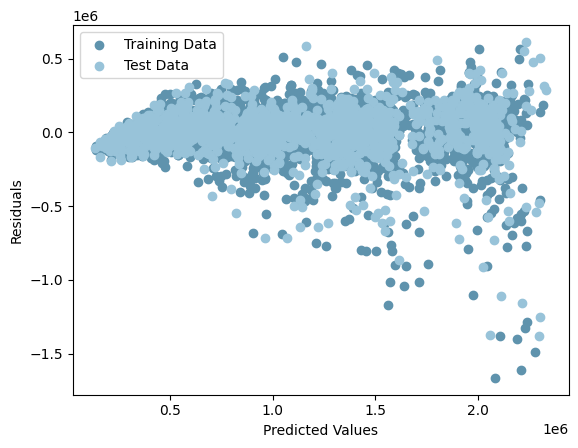

In [ ]:
from sklearn.linear_model import LinearRegression

print('\033[1mInference:\033[0m The training data has been normalized')
mean_label = y_train.mean(axis = 0)
std_label = y_train.std(axis = 0)
mean_feat = x_train.mean(axis = 0)
std_feat = x_train.std(axis = 0)
x_train_NORM = (x_train - mean_feat)/std_feat
y_train_NORM = (y_train - mean_label)/std_label

# Fitting Simple Linear Regression Model to the training set
regressor = LinearRegression()
regressor = regressor.fit(x_train_NORM, y_train_NORM)

x_test_NORM = (x_test - mean_feat)/std_feat

test_PRED = regressor.predict(x_test_NORM)
test_PRED *= std_label
test_PRED += mean_label

train_PRED = regressor.predict(x_train_NORM)
train_PRED *= std_label
train_PRED += mean_label

#Visualization of Training results
print('\n\033[1mVisualisation Of Training And Testing Results:\033[0m')
plt.scatter(train_PRED, train_PRED - y_train, color = '#5f93ad', label = 'Training Data')
plt.scatter(test_PRED, test_PRED - y_test, color = '#98c3d9', label = 'Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, train_PRED)
r2 = r2_score(y_train, train_PRED)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

**Without Normalisation**


Visualisation Of Training And Testing Results:
Mean Squared Error: 21484129252.364853
R^2 Score: 0.9321193510077667


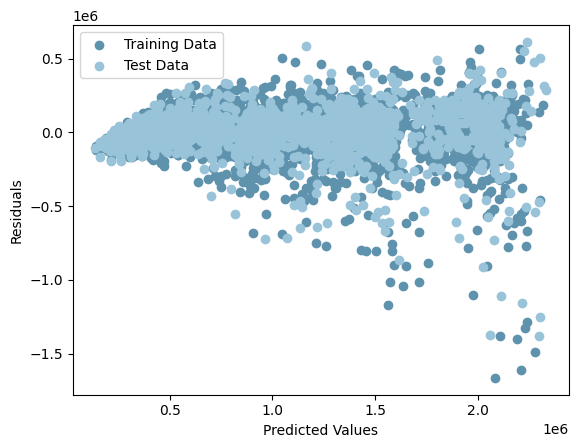

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitting Simple Linear Regression Model to the training set
regressor = LinearRegression()
regressor = regressor.fit(x_train, y_train)

# Predicting the Result
Test_pred = regressor.predict(x_test)
Train_pred = regressor.predict(x_train)

#Visualization of Training results
print('\n\033[1mVisualisation Of Training And Testing Results:\033[0m')
plt.scatter(Train_pred, Train_pred - y_train, color = '#5f93ad', label = 'Training Data')
plt.scatter(Test_pred, Test_pred - y_test, color = '#98c3d9', label = 'Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, Train_pred)
r2 = r2_score(y_train, Train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

### **Linear Regression -- Keras Implementation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_ker = Sequential()
model_ker.add(Dense(1, input_dim=73, activation='relu'))

optimizer = Adam(learning_rate=0.01)
model_ker.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])

model_ker.fit(x_train, y_train, epochs=100, verbose=0)

mse_value = model_ker.evaluate(x_test, y_test, verbose=0)
print('MSE test: '+str(mse_value))

TEST_pred = model_ker.predict(x_test).flatten()
TRAIN_pred = model_ker.predict(x_train).flatten()

MSE test: [1430260285440.0, 0.0]
141/141 [==============================] - 0s 1ms/step


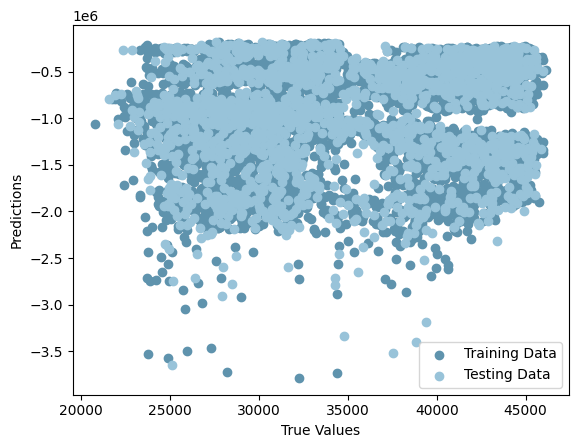

In [ ]:
plt.scatter(TRAIN_pred, TRAIN_pred - y_train, label='Training Data', color='#5f93ad')
plt.scatter(TEST_pred, TEST_pred - y_test, label='Testing Data', color='#98c3d9')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# **Extra Task**
##**Task 1-3: Improving Linear Regression Basic Solution**

**Task 1-3 (extra):** Try to improve your Keras based solution (from previous task) to get better model and as result a better prediction… (Hint: you may play with network architecture and training hyper-parameters: learning rate, optimization algorithm, activation functions, number of epochs, batch sizes, etc.). Show the results and corresponding configurations in the table.

**Improvement Level 1:**
1. Addition of one more Dense layer, the final layer with linear activation function for regression. Number of neurons in the first layer is now 64 and 1 for the final layer

MSE test: [309540552704.0, 0.0]
141/141 [==============================] - 0s 884us/step


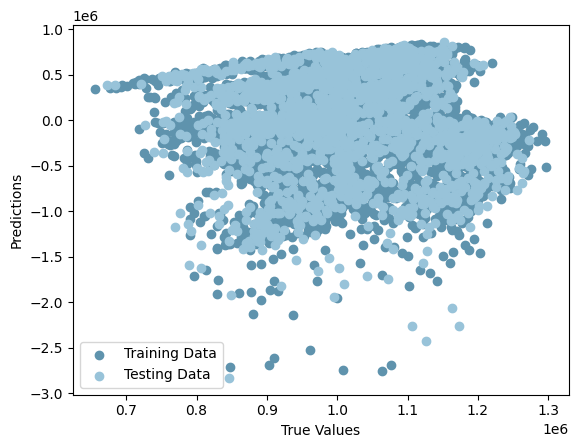

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_ker = Sequential()
model_ker.add(Dense(64, input_dim=73, activation='relu'))
model_ker.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.01)
model_ker.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])

model_ker.fit(x_train, y_train, epochs=100, verbose=0)

mse_value = model_ker.evaluate(x_test, y_test, verbose=0)
print('MSE test: '+str(mse_value))

TEST_pred = model_ker.predict(x_test).flatten()
TRAIN_pred = model_ker.predict(x_train).flatten()

plt.scatter(TRAIN_pred, TRAIN_pred - y_train, label='Training Data', color='#5f93ad')
plt.scatter(TEST_pred, TEST_pred - y_test, label='Testing Data', color='#98c3d9')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

**Inference:** We already see the progress towards the more familiar form of Simple Linear Regression

**Improvement Level 2:**
1. Addition of two more Dense layers, the final layer with linear activation function for regression
2. Learning rate changed from 0.01 to 0.001
3. Metrics is MAE, not accuracy
4. Number of Epochs is 200, not 100
5. Batch size is now 32

MSE test: 25222008832.0
MAE test: 96886.34375
141/141 [==============================] - 0s 1ms/step


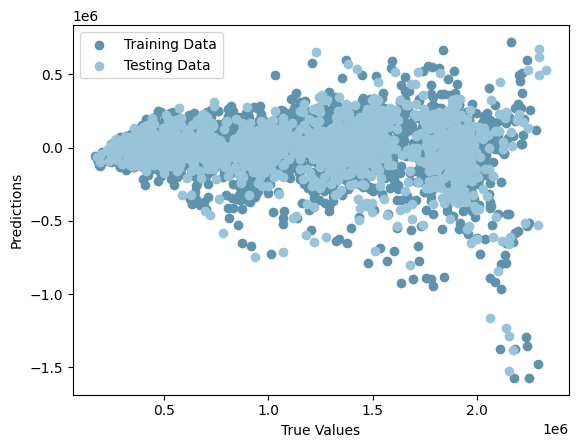

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Improved model architecture
model_ker = Sequential()
model_ker.add(Dense(128, input_dim=73, activation='relu'))
model_ker.add(Dense(64, activation='relu'))
model_ker.add(Dense(1, activation='linear'))  # Use linear activation for regression tasks

# Experiment with different optimizer and learning rate
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model_ker.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])  # Using Mean Absolute Error (MAE) as a metric

# Increase the number of epochs for potentially better convergence
model_ker.fit(x_train, y_train, epochs=200, verbose=0, batch_size=32)  # Adjust batch_size as needed

# Evaluate the model on the test set
mse_value, mae_value = model_ker.evaluate(x_test, y_test, verbose=0)
print('MSE test:', mse_value)
print('MAE test:', mae_value)

# Make predictions
TEST_pred = model_ker.predict(x_test).flatten()
TRAIN_pred = model_ker.predict(x_train).flatten()

# Plotting
plt.scatter(TRAIN_pred, TRAIN_pred - y_train, label='Training Data', color='#5f93ad')
plt.scatter(TEST_pred, TEST_pred - y_test, label='Testing Data', color='#98c3d9')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


**Inference:** We see the great imrovement in scatterplot visualisation — it's the familiar Linear regression scatterplot that we got from Simple LR and Scikit LR earlier

**Improvement Level 3:**
1. Addition of Normalisation to the X_data
2. Addition of two Dropout layers for regularisation
3. Learning rate changed from 0.001 to 0.0001
3. Addition of more Dense layers with smoother flattening in neurons in every new Dense layer
4. Number of Epochs is 300, not 200
5. Batch size is now 64, not 32

Epoch 1/300
71/71 [==============================] - 1s 2ms/step - loss: 1407878561792.0000 - mae: 1044691.1250
Epoch 2/300
71/71 [==============================] - 0s 2ms/step - loss: 1407874629632.0000 - mae: 1044689.2500
Epoch 3/300
71/71 [==============================] - 0s 2ms/step - loss: 1407867944960.0000 - mae: 1044686.5625
Epoch 4/300
71/71 [==============================] - 0s 2ms/step - loss: 1407855099904.0000 - mae: 1044680.4375
Epoch 5/300
71/71 [==============================] - 0s 2ms/step - loss: 1407832817664.0000 - mae: 1044670.5000
Epoch 6/300
71/71 [==============================] - 0s 2ms/step - loss: 1407795593216.0000 - mae: 1044653.3750
Epoch 7/300
71/71 [==============================] - 0s 2ms/step - loss: 1407739101184.0000 - mae: 1044628.8125
Epoch 8/300
71/71 [==============================] - 0s 2ms/step - loss: 1407654428672.0000 - mae: 1044591.8750
Epoch 9/300
71/71 [==============================] - 0s 2ms/step - loss: 1407534628864.0000 - mae: 10445

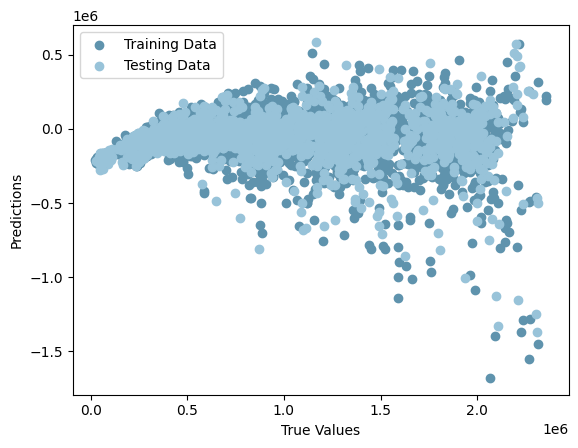

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Improved model architecture
model_ker = Sequential()
model_ker.add(Dense(128, input_dim=73, activation='relu'))
model_ker.add(Dropout(0.5))  # Introduce dropout for regularization
model_ker.add(Dense(64, activation='relu'))
model_ker.add(Dense(32, activation='relu'))
model_ker.add(Dropout(0.3))  # Introduce another dropout layer
model_ker.add(Dense(1, activation='linear'))

# Experiment with different optimizer and learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjust the learning rate as needed
model_ker.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])  # Using Mean Absolute Error (MAE) as a metric

# Increase the number of epochs for potentially better convergence
model_ker.fit(x_train_scaled, y_train, epochs=300, verbose=1, batch_size=64)  # Adjust batch_size as needed

# Evaluate the model on the test set
mse_value, mae_value = model_ker.evaluate(x_test_scaled, y_test, verbose=0)
print('MSE test:', mse_value)
print('MAE test:', mae_value)

# Make predictions
TEST_pred = model_ker.predict(x_test_scaled).flatten()
TRAIN_pred = model_ker.predict(x_train_scaled).flatten()

# Plotting
plt.scatter(TRAIN_pred, TRAIN_pred - y_train, label='Training Data', color='#5f93ad')
plt.scatter(TEST_pred, TEST_pred - y_test, label='Testing Data', color='#98c3d9')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

**Inference:** We see the even bigger imrovement in scatterplot visualisation — it's the familiar Linear regression scatterplot that we got from Simple LR and Scikit LR earlier

**Improvement Level 4:**
1. Added the EarlyStopping callback to monitor the validation loss and stop training if it does not improve for a certain number of epochs (patience).
2. Increased the number of training epochs to 500.
3. Utilized a validation split of 20% during training to monitor overfitting more effectively.

Epoch 1/500
57/57 [==============================] - 2s 9ms/step - loss: 1410801991680.0000 - mae: 1045406.3125 - val_loss: 1396190347264.0000 - val_mae: 1041834.1250
Epoch 2/500
57/57 [==============================] - 0s 2ms/step - loss: 1410798845952.0000 - mae: 1045404.6250 - val_loss: 1396186415104.0000 - val_mae: 1041832.5000
Epoch 3/500
57/57 [==============================] - 0s 2ms/step - loss: 1410793734144.0000 - mae: 1045402.2500 - val_loss: 1396179861504.0000 - val_mae: 1041829.3750
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 1410785607680.0000 - mae: 1045398.4375 - val_loss: 1396169506816.0000 - val_mae: 1041824.6875
Epoch 5/500
57/57 [==============================] - 0s 2ms/step - loss: 1410772631552.0000 - mae: 1045392.8125 - val_loss: 1396153384960.0000 - val_mae: 1041817.3750
Epoch 6/500
57/57 [==============================] - 0s 2ms/step - loss: 1410752839680.0000 - mae: 1045383.8750 - val_loss: 1396128612352.0000 - val_mae: 1041806.375

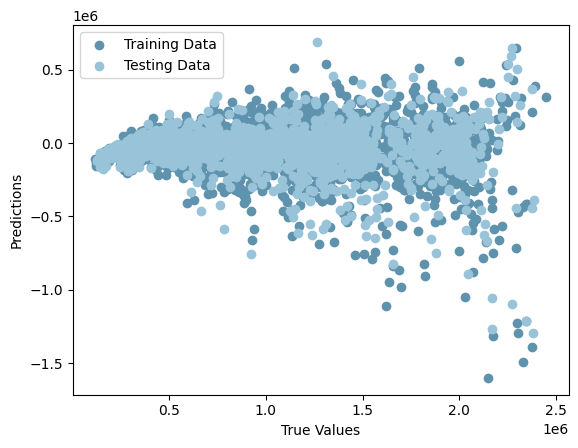

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Improved model architecture
model_ker = Sequential()
model_ker.add(Dense(128, input_dim=73, activation='relu'))
model_ker.add(Dropout(0.5))
model_ker.add(Dense(64, activation='relu'))
model_ker.add(Dense(32, activation='relu'))
model_ker.add(Dropout(0.3))
model_ker.add(Dense(1, activation='linear'))

# Experiment with different optimizer and learning rate
optimizer = Adam(learning_rate=0.0001)
model_ker.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Increase the number of epochs for potentially better convergence
history = model_ker.fit(x_train_scaled, y_train, epochs=500, verbose=1, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
mse_value, mae_value = model_ker.evaluate(x_test_scaled, y_test, verbose=0)
print('MSE test:', mse_value)
print('MAE test:', mae_value)

# Make predictions
TEST_pred = model_ker.predict(x_test_scaled).flatten()
TRAIN_pred = model_ker.predict(x_train_scaled).flatten()

# Plotting
plt.scatter(TRAIN_pred, TRAIN_pred - y_train, label='Training Data', color='#5f93ad')
plt.scatter(TEST_pred, TEST_pred - y_test, label='Testing Data', color='#98c3d9')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


**Inference:** Quite great progress in MSE values and visual fitting.

**Improvement Level 5:**
1. Increased the model's capacity with more neurons in each layer.
2. Added more Dropout layers for better regularization.
3. Added the ReduceLROnPlateau callback to adjust the learning rate during training if the validation loss plateaus.
4. Adjusted the patience values for EarlyStopping and ReduceLROnPlateau.

Epoch 1/500
57/57 [==============================] - 2s 5ms/step - loss: 1410800287744.0000 - mae: 1045405.2500 - val_loss: 1396187987968.0000 - val_mae: 1041833.0625 - lr: 1.0000e-04
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 1410793340928.0000 - mae: 1045402.0000 - val_loss: 1396176060416.0000 - val_mae: 1041827.5000 - lr: 1.0000e-04
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 1410771845120.0000 - mae: 1045391.6875 - val_loss: 1396140539904.0000 - val_mae: 1041810.7500 - lr: 1.0000e-04
Epoch 4/500
57/57 [==============================] - 0s 4ms/step - loss: 1410711814144.0000 - mae: 1045364.1875 - val_loss: 1396045119488.0000 - val_mae: 1041766.8125 - lr: 1.0000e-04
Epoch 5/500
57/57 [==============================] - 0s 3ms/step - loss: 1410558328832.0000 - mae: 1045293.5625 - val_loss: 1395811680256.0000 - val_mae: 1041661.1875 - lr: 1.0000e-04
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 1410206

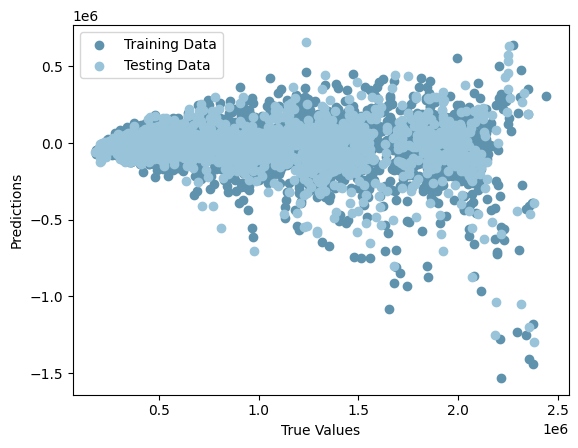

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Improved model architecture
model_ker = Sequential()
model_ker.add(Dense(256, input_dim=73, activation='relu'))
model_ker.add(Dropout(0.5))
model_ker.add(Dense(128, activation='relu'))
model_ker.add(Dropout(0.4))
model_ker.add(Dense(64, activation='relu'))
model_ker.add(Dropout(0.3))
model_ker.add(Dense(32, activation='relu'))
model_ker.add(Dense(1, activation='linear'))

# Experiment with different optimizer and learning rate
optimizer = Adam(learning_rate=0.0001)
model_ker.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Use EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6, verbose=1)

# Increase the number of epochs for potentially better convergence
history = model_ker.fit(x_train_scaled, y_train, epochs=500, verbose=1, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
mse_value, mae_value = model_ker.evaluate(x_test_scaled, y_test, verbose=0)
print('MSE test:', mse_value)
print('MAE test:', mae_value)

# Make predictions
TEST_pred = model_ker.predict(x_test_scaled).flatten()
TRAIN_pred = model_ker.predict(x_train_scaled).flatten()

# Plotting
plt.scatter(TRAIN_pred, TRAIN_pred - y_train, label='Training Data', color='#5f93ad')
plt.scatter(TEST_pred, TEST_pred - y_test, label='Testing Data', color='#98c3d9')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

**Inference:** Again, great improvement in MSE